# Simple example where we fit a linear function.

  Notes:
     The x-axis must be binned the sample for all data sets.


In [58]:
import numpy as np
from tensorflow import keras
from bumps.initpop import lhs_init
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

# Generate the data

In the present case it will just be a straight line + random noise

In [331]:
n_sample = 31000
n_train = 30000
x_values = np.arange(0,1,0.02)

parameters = lhs_init(n_sample, [1,1], [[-1,0],[1,0.5]], use_point=False)

def compute_for_params(x_values, params, noise=True):
    y_values = []
    for x in x_values:
        _y_value = params[0]*x + params[1]
        if noise:
            _y_value += .01*np.random.normal()
        y_values.append(_y_value)
    return y_values
    
    
# For each set of parameters (slope, constant), generate the data curve y(x).
data_sets = []
for p in parameters:
    # Generate the y-value for each to the x-values
    # Adding random noise
    y_values = compute_for_params(x_values, p, noise=True)
    data_sets.append(y_values)

# The array of parameters and the array of data sets should be the same length
assert(len(parameters)==len(data_sets))

# NOTE:
Here we may want to pre-process the data sets.
In the case of refletometry, we may for instance multiply by Q^4.
It's best to store the data sets unprocessed so that we can adjust the
processing as needed.


<IPython.core.display.Javascript object>


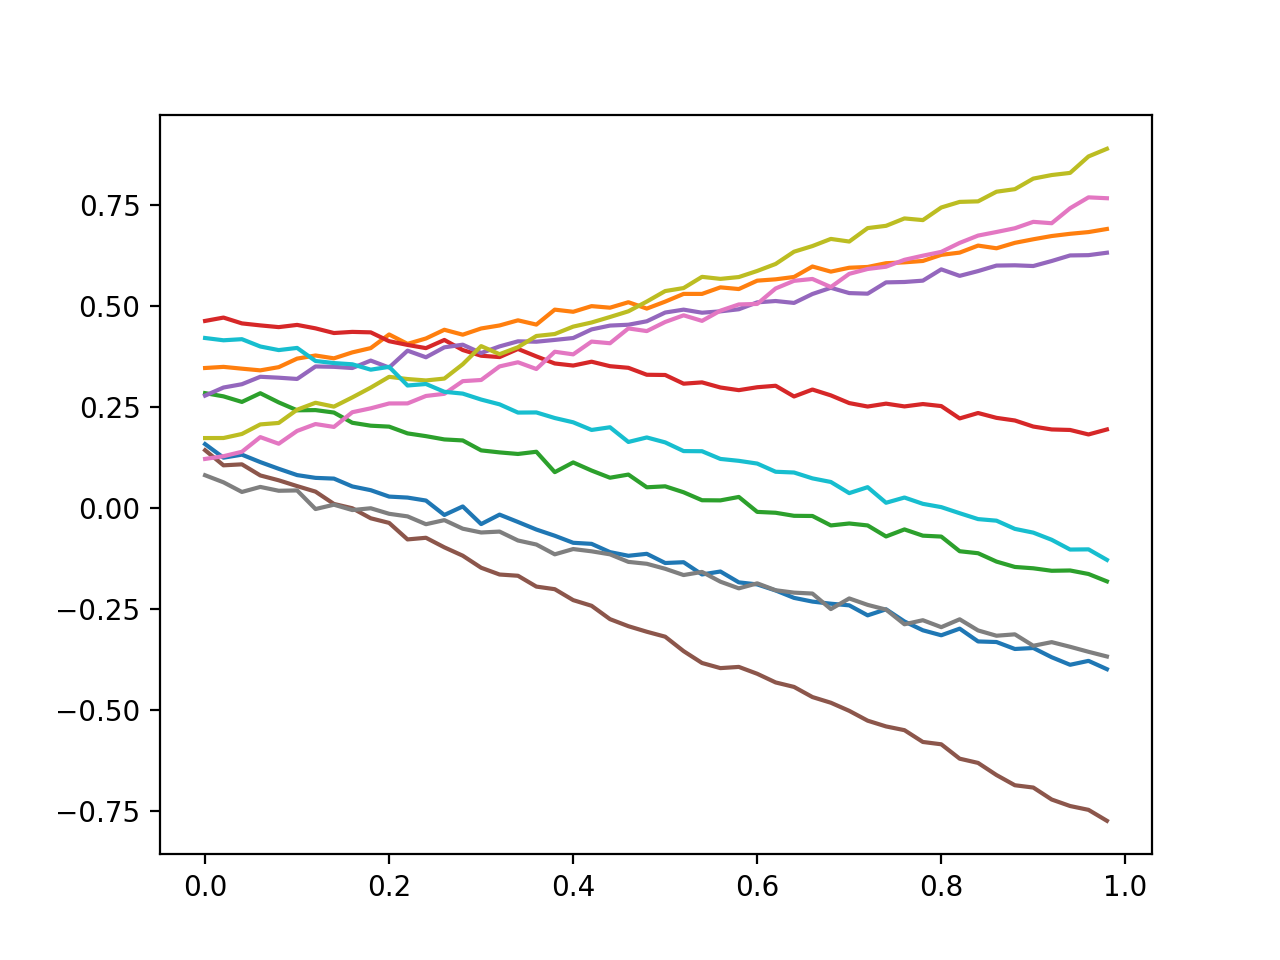

In [332]:
# Plotting a few curves
plt.figure()
for i in range(10):
    plt.plot(x_values, data_sets[i])

# Split the data in two parts: training set and validation set

In [333]:
# Let's split the data sets in two parts, one for training and one for validation.
train_data = np.asarray(data_sets[:n_train])
train_pars = np.asarray(parameters[:n_train])

validation_data = np.asarray(data_sets[n_train:])
validation_pars = np.asarray(parameters[n_train:])

print(train_data.shape, train_pars.shape)


(30000, 50) (30000, 2)


# Create a TensorFlow model

In [368]:
print("Input number of points: %g" % train_data.shape[1:])
input_ = keras.layers.Input(shape=train_data.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(train_pars.shape[1])(concat)
model = keras.Model(inputs=[input_], outputs=[output])

#model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.001))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.01, nesterov=True))


Input number of points: 50


In [369]:
history = model.fit(train_data, train_pars, epochs=50,
                    validation_data=[validation_data, validation_pars])

Train on 30000 samples, validate on 1000 samples
Epoch 1/50
30000/30000 [==============================] - 1s 32us/sample - loss: 0.0094 - val_loss: 5.2585e-04
Epoch 2/50
30000/30000 [==============================] - 1s 25us/sample - loss: 3.1897e-04 - val_loss: 2.1744e-04
Epoch 3/50
30000/30000 [==============================] - 1s 24us/sample - loss: 1.9478e-04 - val_loss: 1.7021e-04
Epoch 4/50
30000/30000 [==============================] - 1s 24us/sample - loss: 1.6530e-04 - val_loss: 1.5078e-04
Epoch 5/50
30000/30000 [==============================] - 1s 24us/sample - loss: 1.4983e-04 - val_loss: 1.4029e-04
Epoch 6/50
30000/30000 [==============================] - 1s 25us/sample - loss: 1.3971e-04 - val_loss: 1.3134e-04
Epoch 7/50
30000/30000 [==============================] - 1s 24us/sample - loss: 1.3270e-04 - val_loss: 1.2637e-04
Epoch 8/50
30000/30000 [==============================] - 1s 24us/sample - loss: 1.2766e-04 - val_loss: 1.2286e-04
Epoch 9/50
30000/30000 [===========

<IPython.core.display.Javascript object>


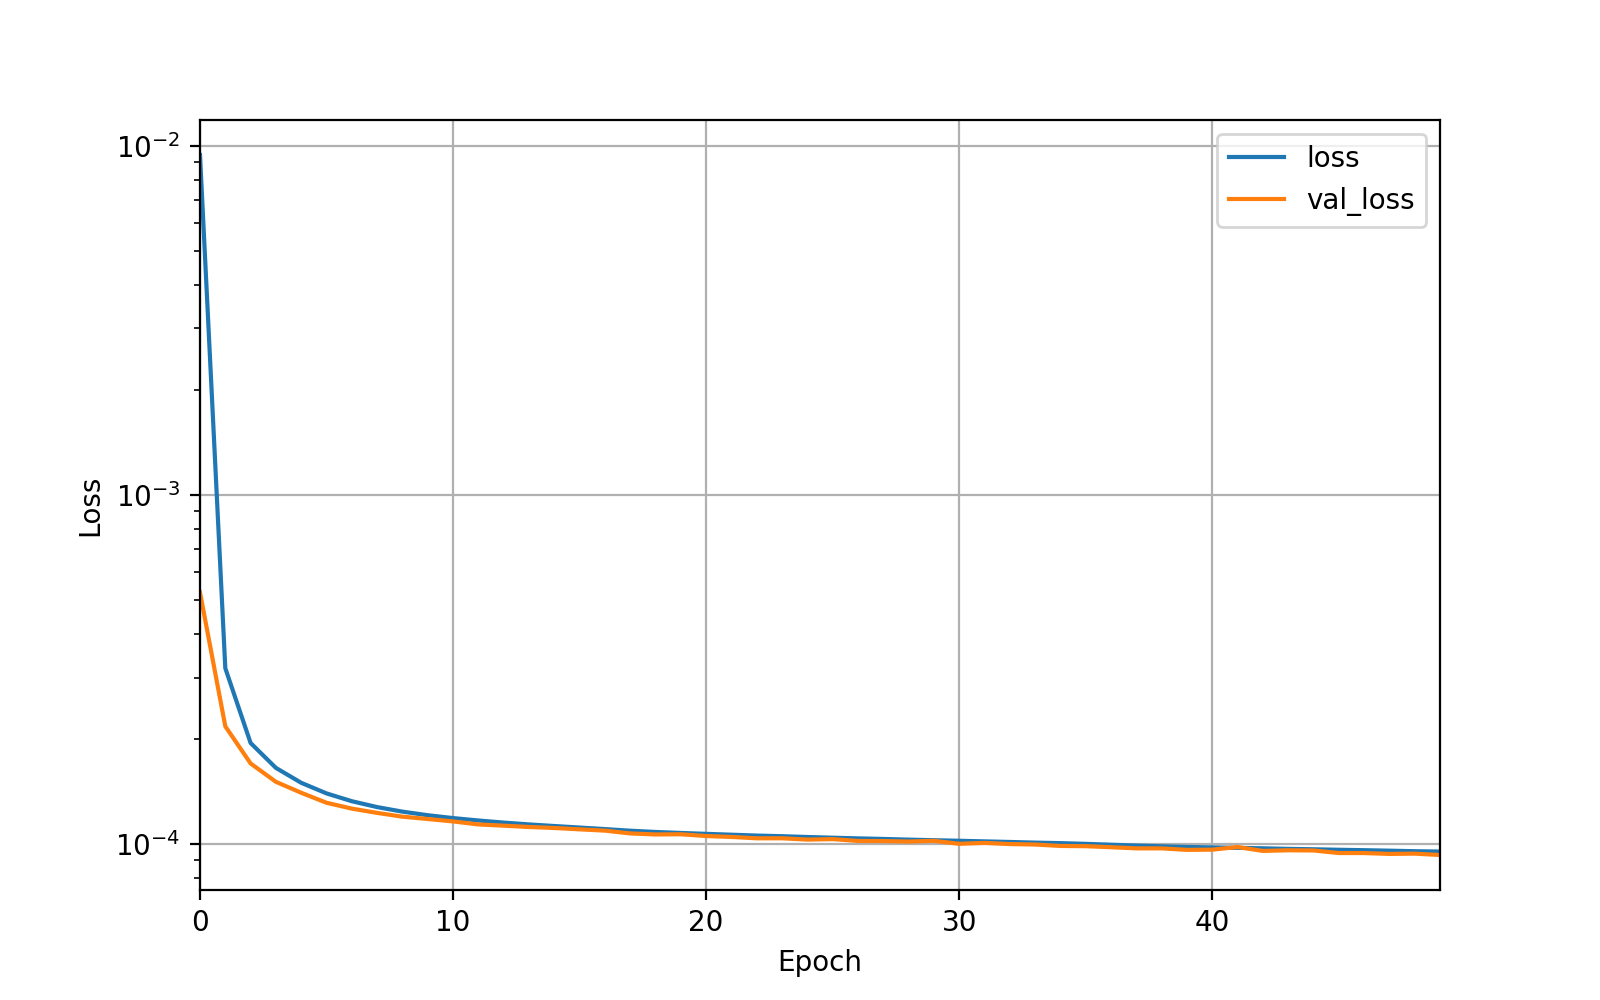

In [370]:
# We should save the history for plotting later
#json.dump(history.history, open(os.path.join(test_output_dir, "%s_history.json" % base_model_name), 'w'))

pd.DataFrame(history.history).plot(figsize=(8 ,5))
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

# We should always save the trained model

In [96]:
def save_model(model, model_name, data_dir=''):
    """
        Save a trained model
        @param model: TensorFlow model
        @param model_name: base name for saved files
        @param data_dir: output directory
    """
    # serialize model to JSON
    model_json = model.to_json()
    with open(os.path.join(data_dir, "%s.json" % model_name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(os.path.join(data_dir, "%s.h5" % model_name))


# Check how well the model does

The validation set has not been used for training. It's only used for validation.

Slope = 0.825768 [pred=0.822584]   Constant = 0.30462 [pred=0.300736]
Slope = 0.0743683 [pred=0.0815799]   Constant = 0.496378 [pred=0.510825]
Slope = -0.517023 [pred=-0.521389]   Constant = 0.118456 [pred=0.112543]
Slope = -0.146257 [pred=-0.137417]   Constant = 0.468813 [pred=0.464855]
Slope = -0.254346 [pred=-0.248915]   Constant = 0.488354 [pred=0.486999]
Slope = 0.623256 [pred=0.624407]   Constant = 0.430548 [pred=0.423678]
Slope = 0.571284 [pred=0.580154]   Constant = 0.166445 [pred=0.176132]
Slope = -0.917071 [pred=-0.894285]   Constant = 0.0772848 [pred=0.0820124]
Slope = -0.249 [pred=-0.255033]   Constant = 0.108156 [pred=0.10317]
Slope = -0.45526 [pred=-0.444653]   Constant = 0.190266 [pred=0.182154]
[-0.65419576  0.14097281] [-0.6601307   0.14278089]


<IPython.core.display.Javascript object>


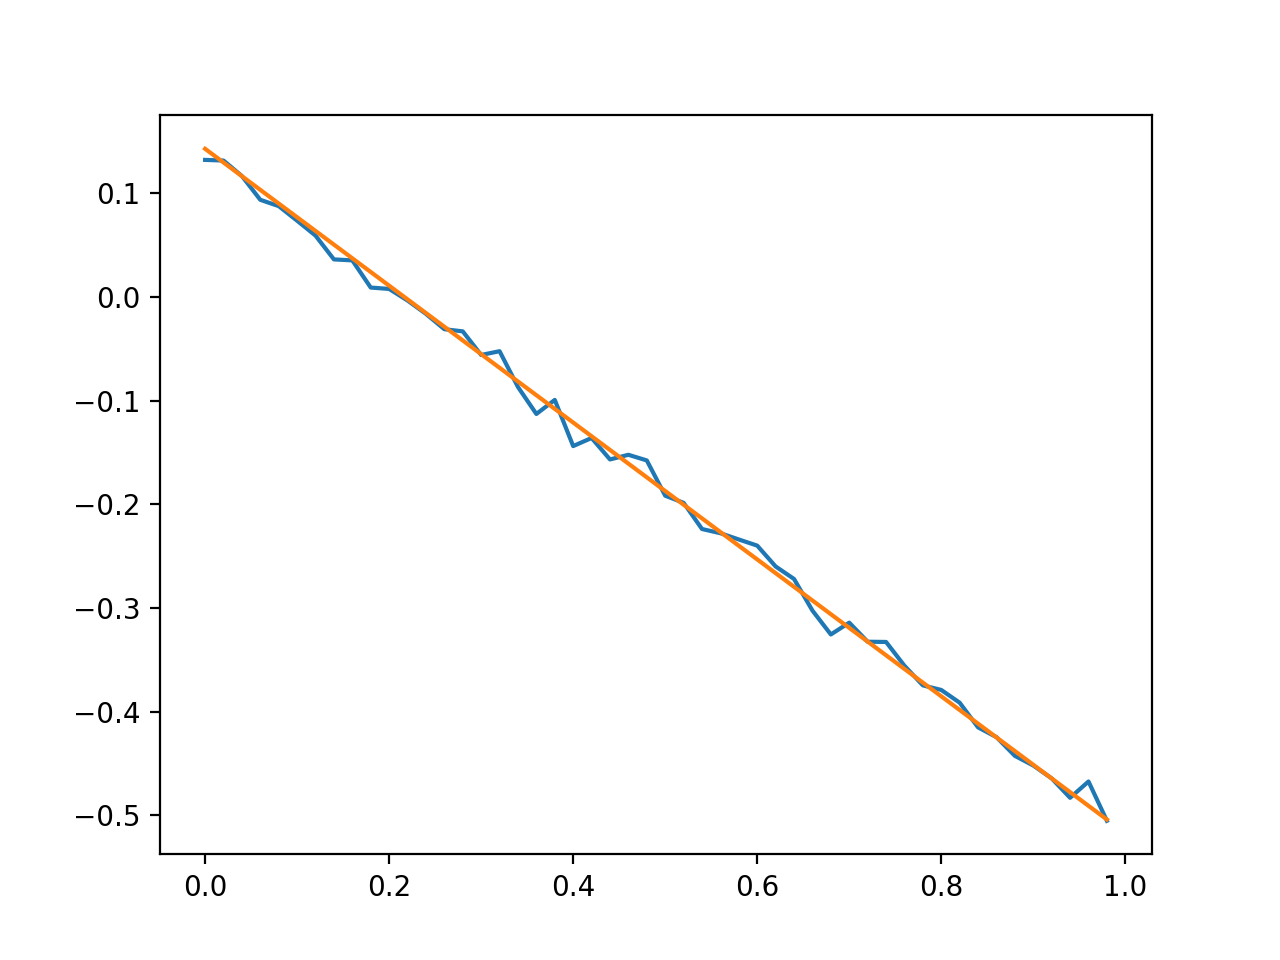

In [379]:
# Obtain the predicted parameters for the first 10 validation data sets
# Note: The predict() method takes an array of data set.
preds = model.predict(validation_data[:100])

for i in range(10):
    print("Slope = %g [pred=%g]   Constant = %g [pred=%g]" % (validation_pars[i][0], preds[i][0],
                                                             validation_pars[i][1], preds[i][1]))

i = int(np.random.random()*100)
print(validation_pars[i], preds[i])
plt.figure()
# Get the predicted curve for the predicted parameters
y_values = compute_for_params(x_values, preds[i], noise=False)

plt.plot(x_values, validation_data[i])
plt.plot(x_values, y_values)
